<a href="https://colab.research.google.com/github/tran-linh41214/Customer-Segmentation-for-Retention-Revenue-Growth-Python-RFM-Model-/blob/main/Tr%E1%BA%A7n_Di%E1%BB%87u_Linh_RFM_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install squarify

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Python_Final_Project/ecommerce_retail.csv', encoding='latin1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom


# **1. EDA**

***1.1. Explore data***


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


➡️ Missing Data:  
- Removed null CustomerID rows.  
- Dropped Description column due to limited analytical value.  

➡️ Data type:  
- InvoiceDate => convert to Datetime type  
- CustomerID => convert to object type

In [ ]:
print('DataFrame dimension: ', data.shape)

DataFrame dimension:  (541909, 8)


In [ ]:
print(data.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


➡️ Remove negative quantity values in df calculate RMF, keep in df data to get insight  
➡️ Remove excessively large quantity values  
➡️ UnitPrice < 0 => incorrect values => remove  

In [ ]:
# subset dataframe to indicate rows that have negative values
print('Row with negative Quantity (<0)')
data[data['Quantity'] < 0]

Row with negative Quantity (<0)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01/12/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01/12/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01/12/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01/12/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01/12/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09/12/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,09/12/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09/12/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09/12/2011 11:58,1.25,17315.0,United Kingdom


In [ ]:
# The symbol "C" in "InvoiceNo" indicates a canceled order. Check if a negative Quantity always corresponds to a canceled order.
# Create a column to check the cancellation status of the data.
data['InvoiceNo'] = data['InvoiceNo'].astype(str)
data['check_cancel'] = data['InvoiceNo'].apply(lambda x: True if x[0] == 'C' else False)

# Check if the reason for Quantity < 0 is due to order cancellation.
data[(data['check_cancel'] == True) & (data['Quantity'] < 0)].sort_values('Quantity')
data[(data['check_cancel'] == True) & (data['Quantity'] <= 0)].sort_values('Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,check_cancel
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,09/12/2011 9:27,2.08,16446.0,United Kingdom,True
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,18/01/2011 10:17,1.04,12346.0,United Kingdom,True
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,02/12/2010 14:23,0.03,15838.0,United Kingdom,True
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,18/04/2011 13:08,2.10,15749.0,United Kingdom,True
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,18/04/2011 13:08,1.85,15749.0,United Kingdom,True
...,...,...,...,...,...,...,...,...,...
343666,C566957,23203,JUMBO BAG VINTAGE DOILY,-1,15/09/2011 16:45,2.08,18172.0,United Kingdom,True
343665,C566956,22424,ENAMEL BREAD BIN CREAM,-1,15/09/2011 16:45,12.75,14019.0,United Kingdom,True
173411,C551712,22798,ANTIQUE GLASS DRESSING TABLE POT,-1,03/05/2011 15:04,2.95,13267.0,United Kingdom,True
343715,C566961,23245,SET OF 3 REGENCY CAKE TINS,-1,15/09/2011 17:04,4.95,13319.0,United Kingdom,True


In [ ]:
# Check orders without "C" (canceled) that still have a negative quantity
data[(data['check_cancel'] == False) & (data['Quantity'] < 0)].sort_values('Quantity')
data[(data['check_cancel'] == False) & (data['Quantity'] <= 0)].sort_values('Quantity')

data[(data['check_cancel'] == False) & (data['Quantity'] < 0)]['Description'].value_counts()

,count
Description,
check,120
damages,45
damaged,42
?,41
sold as set on dotcom,20
...,...
POSSIBLE DAMAGES OR LOST?,1
"MERCHANT CHANDLER CREDIT ERROR, STO",1
mystery! Only ever imported 1800,1


***1.2. Create a canceled orders table.***

In [ ]:
# Invoices with a "C" at the beginning are canceled transactions.
cancelled = data['InvoiceNo'].astype(str).str.contains('C')
# Assign 0 to non-canceled orders and 1 to canceled orders.
cancelled.fillna(0, inplace=True)
cancelled = cancelled.astype(int)
cancelled.value_counts()

,count
InvoiceNo,
0,532621
1,9288


=> Number of cancelled orders: 9288

In [ ]:
data['order_cancelled'] = cancelled
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,check_cancel,order_cancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom,False,0
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom,False,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom,False,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom,False,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom,False,0


*Calculate number of cancelled orders and proportion*

In [ ]:
c1 = data['order_cancelled'].value_counts()[1]
c2 = data.shape[0]
print("Number of cancelled transactions: ", c1)
print('Percent of orders cancelled: {}/{} ({:.2f}%) '.format(c1, c2, c1/c2*100))

Number of cancelled transactions:  9288
Percent of orders cancelled: 9288/541909 (1.71%) 


***1.3. Clean data, create df_Transaction***

In [ ]:
# Create a copy of the 'data' dataframe
df_Transaction = data.copy()

# Remove canceled transactions
df_Transaction = df_Transaction[df_Transaction['order_cancelled'] == 0]

# Drop the 'Description' column
df_Transaction = df_Transaction.drop(columns=['Description'])

# Remove rows with missing CustomerID
df_Transaction = df_Transaction.dropna(subset=['CustomerID'])

# Check for duplicates
print('Duplicate entries: {}'.format(df_Transaction.duplicated().sum()))
print('{}% rows are duplicate.'.format(round((df_Transaction.duplicated().sum()/df_Transaction.shape[0])*100),2))

# Drop duplicate data
df_Transaction.drop_duplicates(inplace=True)

# Change data type for CustomerID and InvoiceDate
df_Transaction['CustomerID'] = df_Transaction['CustomerID'].astype(str)  # Convert CustomerID to object type
df_Transaction['InvoiceDate'] = pd.to_datetime(df_Transaction['InvoiceDate'], format='%d/%m/%Y %H:%M')  # Convert InvoiceDate to datetime

# Remove negative UnitPrice and Quantity
df_Transaction = df_Transaction[(df_Transaction['UnitPrice'] > 0) & (df_Transaction['Quantity'] > 0)]

# Check EDA results
print(df_Transaction.head())
print(df_Transaction.describe())
print(df_Transaction.dtypes)


Duplicate entries: 5194
1% rows are duplicate.
  InvoiceNo StockCode  Quantity         InvoiceDate  UnitPrice CustomerID  \
0    536365    85123A         6 2010-12-01 08:26:00       2.55    17850.0   
1    536365     71053         6 2010-12-01 08:26:00       3.39    17850.0   
2    536365    84406B         8 2010-12-01 08:26:00       2.75    17850.0   
3    536365    84029G         6 2010-12-01 08:26:00       3.39    17850.0   
4    536365    84029E         6 2010-12-01 08:26:00       3.39    17850.0   

          Country  check_cancel  order_cancelled  
0  United Kingdom         False                0  
1  United Kingdom         False                0  
2  United Kingdom         False                0  
3  United Kingdom         False                0  
4  United Kingdom         False                0  
            Quantity                    InvoiceDate      UnitPrice  \
count  392690.000000                         392690  392690.000000   
mean       13.118997  2011-07-10 19:12:51.82

In [ ]:
df_Transaction.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,check_cancel,order_cancelled
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False,0
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,0
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False,0
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,0
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,0


# **2. CALCULATE RFM**

In [ ]:
# Create Revenue column
df_Transaction['Revenue'] = df_Transaction['UnitPrice'] * df_Transaction['Quantity']
# To display only the date in InvoiceDate
from datetime import datetime
df_Transaction["InvoiceDate"] = df_Transaction["InvoiceDate"].dt.date

import datetime as dt
last_date = max(df_Transaction.InvoiceDate) + dt.timedelta(days=1)

***2.1. Calculate RFM***

In [ ]:
df_rfm = df_Transaction.groupby('CustomerID').agg({'InvoiceDate': lambda x: (last_date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Revenue': lambda x: x.sum()}).reset_index()
df_rfm['InvoiceDate'] = df_rfm['InvoiceDate'].astype(int)

# Rename columns
df_rfm.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'Revenue': 'Monetary'}, inplace=True)
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,3,182,4310.00
2,12348.0,76,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,311,17,334.40


***2.2. Calculate RFM Score***

In [ ]:
# Calculate Recency (R), Frequency (F), and Monetary (M) scores
df_rfm['R_Score'] = pd.qcut(df_rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
df_rfm['F_Score'] = pd.qcut(df_rfm['Frequency'], 5, labels=[1, 2, 3, 4, 5])
df_rfm['M_Score'] = pd.qcut(df_rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Combine R, F, and M scores into a single string
df_rfm['RFM_Score'] = df_rfm['R_Score'].astype(str) + df_rfm['F_Score'].astype(str) + df_rfm['M_Score'].astype(str)

# The result is a DataFrame containing columns R_Score, F_Score, M_Score, and RFM_Score
print(df_rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'RFM_Score']])


     CustomerID  Recency  Frequency  Monetary RFM_Score
0       12346.0      326          1  77183.60       115
1       12347.0        3        182   4310.00       555
2       12348.0       76         31   1797.24       234
3       12349.0       19         73   1757.55       444
4       12350.0      311         17    334.40       122
...         ...      ...        ...       ...       ...
4333    18280.0      278         10    180.60       111
4334    18281.0      181          7     80.82       111
4335    18282.0        8         12    178.05       511
4336    18283.0        4        721   2045.53       554
4337    18287.0       43         70   1837.28       344

[4338 rows x 5 columns]


# **3. Segmentation**

***3.1. Load segmentation table***

In [ ]:
!pip install openpyxl
import io
import requests

url = 'https://docs.google.com/spreadsheets/d/1-gdRDBcGEmwyLV5FiUkAVNL42QubSMx-/export?format=xlsx'
r = requests.get(url)
r.raise_for_status()

df_segment = pd.read_excel(io.BytesIO(r.content), engine='openpyxl')

In [ ]:
# Convert the `RFM Score` column into separate rows
df_segment['RFM_Score'] = df_segment['RFM_Score'].str.split(',')
df_segment = df_segment.explode('RFM_Score').reset_index(drop=True)

# Remove any extra spaces in 'RFM Score' if present
df_segment['RFM_Score'] = df_segment['RFM_Score'].str.strip()

# Result
print(df_segment)

            Segment RFM_Score
0         Champions       555
1         Champions       554
2         Champions       544
3         Champions       545
4         Champions       454
..              ...       ...
120  Lost customers       112
121  Lost customers       121
122  Lost customers       131
123  Lost customers       141
124  Lost customers       151

[125 rows x 2 columns]


***3.2. Merge bảng Segmentation và bảng RFM***

In [ ]:
# Merge 2 tables on "RFM_Score"
df_user = pd.merge(df_rfm, df_segment, on='RFM_Score', how='left')

print(df_user.head())

  CustomerID  Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score  \
0    12346.0      326          1  77183.60       1       1       5       115   
1    12347.0        3        182   4310.00       5       5       5       555   
2    12348.0       76         31   1797.24       2       3       4       234   
3    12349.0       19         73   1757.55       4       4       4       444   
4    12350.0      311         17    334.40       1       2       2       122   

                 Segment  
0       Cannot Lose Them  
1              Champions  
2                At Risk  
3                  Loyal  
4  Hibernating customers  


In [ ]:
# Calculate the number of customers in each segment.
df_segment_data = df_user.groupby('Segment').agg({'CustomerID': lambda x: len(x),
                                                   'Recency': lambda x: x.mean(),
                                                   'Frequency': lambda x: x.sum(),
                                                   'Monetary': lambda x: x.sum()}).reset_index()

df_segment_data.rename(columns={'CustomerID': 'Count'}, inplace=True)
df_segment_data['percent'] = (df_segment_data['Count'] / df_segment_data['Count'].sum()) * 100
df_segment_data['percent'] = df_segment_data['percent'].round(1)

# Rename columns after calculating the aggregations
df_segment_data.rename(columns={'Recency': 'Avg Recency',
                                 'Frequency': 'Orders',
                                 'Monetary': 'Sales'}, inplace=True)

df_segment_data['Avg Recency'] = df_segment_data['Avg Recency'].round(1)
df_segment_data['Avg orders'] = (df_segment_data['Orders'] / df_segment_data['Count']).round(1) # Use 'Count' instead of 'Number of Customers'
df_segment_data['Avg sales'] = (df_segment_data['Sales'] / df_segment_data['Count']).round(1)  # Use 'Count' instead of 'Number of Customers'

print(df_segment_data)

                  Segment  Count  Avg Recency  Orders        Sales  percent  \
0          About To Sleep    191         87.2    4169    54885.370      4.4   
1                 At Risk    424        153.5   34264   652812.360      9.8   
2        Cannot Lose Them     92        222.4    4427   299145.511      2.1   
3               Champions    796         11.8  225788  5436978.980     18.3   
4   Hibernating customers    802        151.0   18735   321486.562     18.5   
5          Lost customers    433        278.7    5079    77092.390     10.0   
6                   Loyal    416         39.0   49980  1022796.800      9.6   
7          Need Attention    229         33.0   13239   332386.070      5.3   
8           New Customers    308         29.6    3423    64641.790      7.1   
9      Potential Loyalist    512         29.2   31326   298319.841     11.8   
10              Promising    135         18.2    2260   326111.370      3.1   

    Avg orders  Avg sales  
0         21.8      287

In [ ]:
df_segment_data

,Segment,Count,Avg Recency,Orders,Sales,percent,Avg orders,Avg sales
0,About To Sleep,191,87.2,4169,54885.370,4.4,21.8,287.4
1,At Risk,424,153.5,34264,652812.360,9.8,80.8,1539.7
2,Cannot Lose Them,92,222.4,4427,299145.511,2.1,48.1,3251.6
3,Champions,796,11.8,225788,5436978.980,18.3,283.7,6830.4
4,Hibernating customers,802,151.0,18735,321486.562,18.5,23.4,400.9
5,Lost customers,433,278.7,5079,77092.390,10.0,11.7,178.0
6,Loyal,416,39.0,49980,1022796.800,9.6,120.1,2458.6
7,Need Attention,229,33.0,13239,332386.070,5.3,57.8,1451.5
8,New Customers,308,29.6,3423,64641.790,7.1,11.1,209.9
9,Potential Loyalist,512,29.2,31326,298319.841,11.8,61.2,582.7




| Phân đoạn               | Đặc điểm                                                                                   | Khuyến nghị                                                                                          |
|-------------------------|-------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------|
| **Champions**           | Mua gần đây, mua thường xuyên và chi tiêu nhiều nhất                                    | Tặng quà, tặng các chương trình ưu đãi. Dùng thử sản phẩm mới miễn phí. Khuyến khích họ quảng bá thương hiệu. |
| **Loyal**               | Chi tiêu khá nhiều và mua thường xuyên. Phản hồi tốt với các chương trình khuyến mãi.     | Đề xuất các sản phẩm giá trị cao hơn. Thu thập đánh giá về sản phầm. Kết nối với họ thường xuyên.                 |
| **Potential Loyalist**  | Khách hàng mới, mua nhiều và mua hơn một lần.                                             | Đưa ra các chương trình thành viên/khách hàng trung thành, giới thiệu sản phẩm khác.                   |
| **New Customers**       | Vừa mới mua, nhưng không thường xuyên.                                                    | Cung cấp hỗ trợ ban đầu, giúp họ mua hàng thành công ngay từ lần đầu.               |
| **Promising**           | Người mua gần đây, nhưng chưa chi nhiều.                                             | Xây dựng nhận diện thương hiệu, cung cấp các bản dùng thử miễn phí.                                  |
| **Need Attention**      | Giá trị Recency, Frequency và Monetary trên trung bình, nhưng chưa mua thường xuyên.      | Đưa ra các ưu đãi có thời hạn dựa trên lịch sử mua hàng trước đây. Khuyến khích khách hàng mua hàng trở lại       |
| **About to Sleep**      | Giá trị Recency, Frequency và Monetary dưới trung bình, có thể sẽ mất nếu không kích hoạt. | Giới thiệu sản phẩm phổ biến hoặc ưu đãi giảm giá. Kết nối lại với họ.   |
| **At Risk**             | Chi tiêu nhiều và mua hàng thường xuyên, nhưng đã lâu không mua.                         | Gửi email, zalo OA,... cá nhân hóa để tái kết nối, đề nghị gia hạn.                    |
| **Cannot Lose Them**    | Đã mua với số lượng lớn và thường xuyên, nhưng lâu rồi không quay lại.                    | Thu hút lại bằng các sản phẩm mới hoặc gia hạn, không để mất khách hàng vào tay đối thủ.                     |
| **Hibernating customers** | Mua hàng đã lâu, ít chi tiêu và ít đơn hàng.                                           | Đề nghị các sản phẩm phù hợp khác và ưu đãi đặc biệt. Xây dựng lại giá trị thương hiệu.             |
| **Lost customers**      | Giá trị Recency, Frequency và Monetary thấp nhất.                                        | Khơi gợi sự quan tâm lại bằng các chiến dịch tiếp cận, nếu không có thể bỏ qua.                     |



# **4. Visualization**

In [ ]:
# Creating color palette
color1 = sns.color_palette('RdYlGn', 11)
color2 = sns.color_palette('GnBu', 11)

### **4.1. Customers share by Segment**

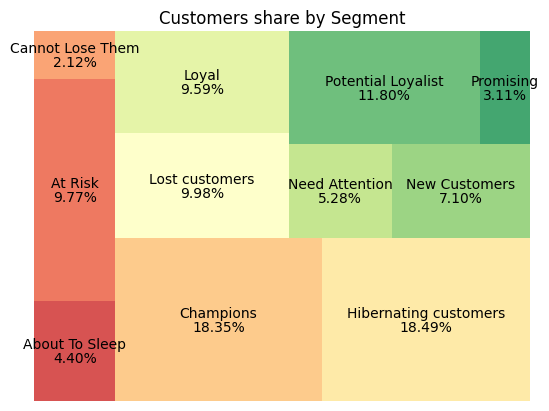

In [ ]:
squarify.plot(sizes=df_segment_data['Count'], value=(df_segment_data['Count'] / df_segment_data['Count'].sum()).map("{:.2%}".format), \
              label=df_segment_data['Segment'], alpha=0.8, color=color1)
plt.title('Customers share by Segment')
plt.axis('off')
plt.show()

### **4.2. Sales share by Segment**

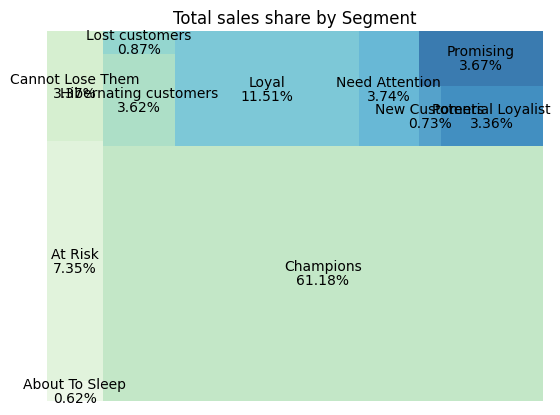

In [ ]:
squarify.plot(sizes=df_segment_data['Sales'], value=(df_segment_data['Sales'] / df_segment_data['Sales'].sum()).map("{:.2%}".format), \
              label=df_segment_data['Segment'], alpha=0.8, color=color2)
plt.title('Total sales share by Segment')
plt.axis('off')
plt.show()

### **4.3. Average orders per customer by Segment**

<Figure size 1000x800 with 0 Axes>

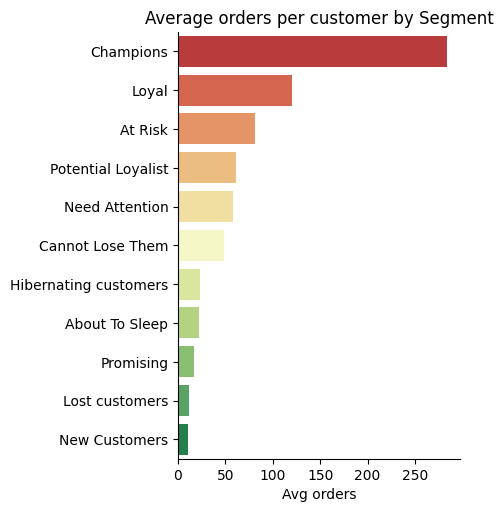

In [ ]:
plt.figure(figsize=(10, 8))
sns.catplot(df_segment_data,
            x='Avg orders',
            y='Segment',
            kind='bar',
            order=df_segment_data.sort_values('Avg orders', ascending=False)['Segment'],
            palette=color1)

plt.title('Average orders per customer by Segment')
plt.xlabel('Avg orders')
plt.ylabel(None)

plt.show()

### **4.4. Average sales per customer by Segment**

<Figure size 1000x800 with 0 Axes>

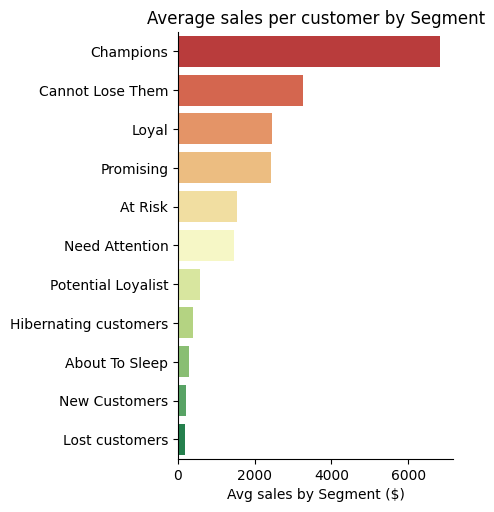

In [30]:
plt.figure(figsize=(10, 8))
sns.catplot(df_segment_data,
            x='Avg sales',
            y='Segment',
            kind='bar',
            order=df_segment_data.sort_values('Avg sales', ascending=False)['Segment'],
            palette=color1)
plt.title('Average sales per customer by Segment')
plt.xlabel('Avg sales by Segment ($)')
plt.ylabel(None)
plt.show()

### **4.5. Recency by Segment**


<Figure size 600x400 with 0 Axes>

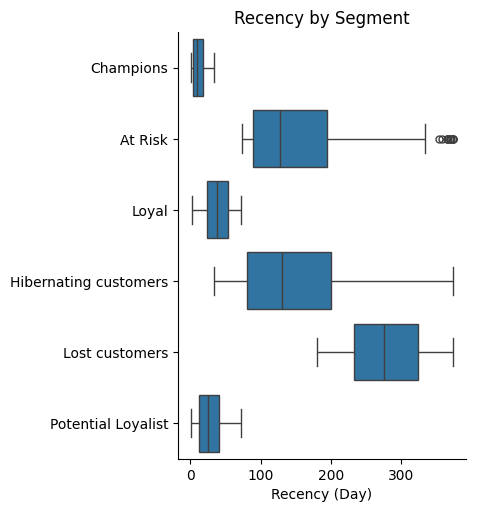

In [29]:
plt.figure(figsize=(6, 4))
sns.catplot(df_user[df_user['Segment'].isin(['Champions', 'Loyal', 'Potential Loyalist', 'At Risk', 'Lost customers', 'Hibernating customers'])], x='Recency', y='Segment', kind='box')
plt.title('Recency by Segment')
plt.xlabel('Recency (Day)')
plt.ylabel(None)
plt.show()

### **4.6. Frequency by Segment**

<Figure size 600x400 with 0 Axes>

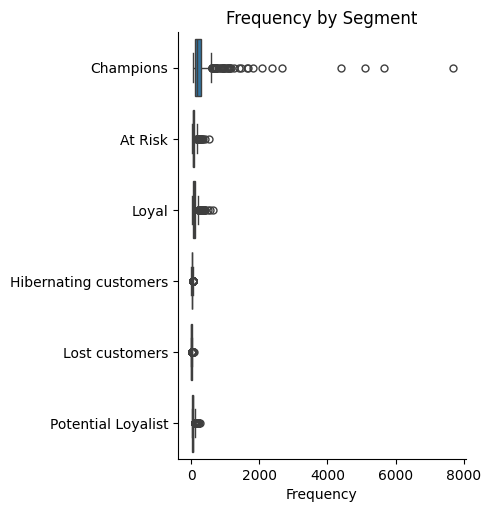

In [31]:
plt.figure(figsize=(6, 4))
sns.catplot(df_user[df_user['Segment'].isin(['Champions', 'Loyal', 'Potential Loyalist', 'At Risk', 'Lost customers', 'Hibernating customers'])], x='Frequency', y='Segment', kind='box')
plt.title('Frequency by Segment')
plt.xlabel('Frequency')
plt.ylabel(None)
plt.show()

### **4.7. Monetary by Segment**

<Figure size 600x400 with 0 Axes>

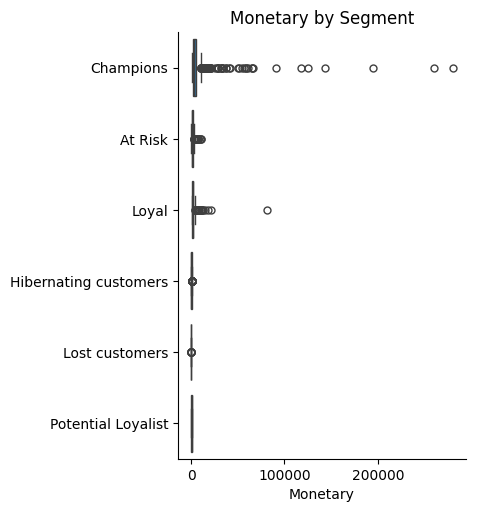

In [33]:
plt.figure(figsize=(6, 4))
sns.catplot(df_user[df_user['Segment'].isin(['Champions', 'Loyal', 'Potential Loyalist', 'At Risk', 'Lost customers', 'Hibernating customers'])], x='Monetary', y='Segment', kind='box')
plt.title('Monetary by Segment')
plt.xlabel('Monetary')
plt.ylabel(None)
plt.show()

***4.1. Histogram distribution***

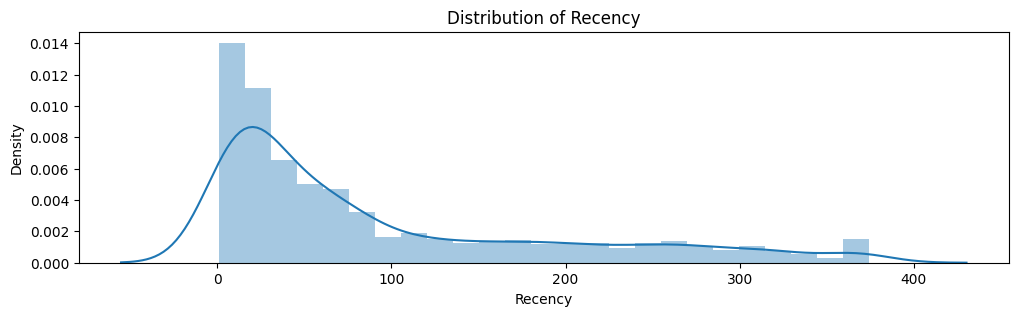

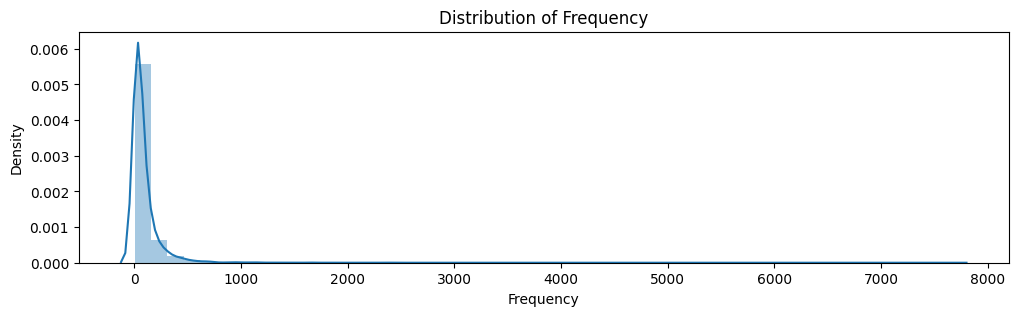

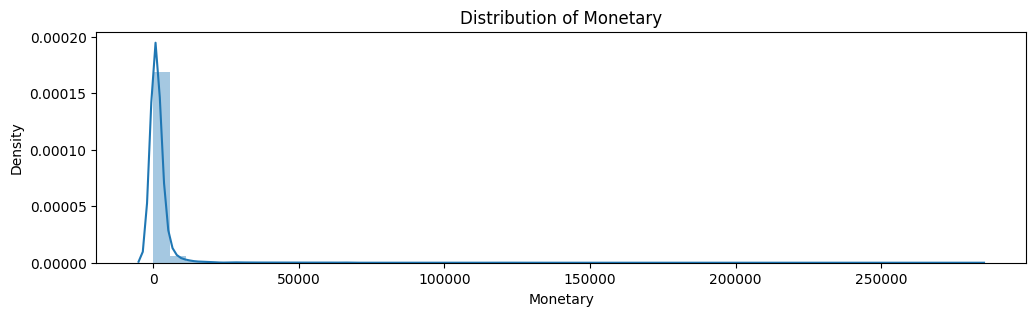

In [ ]:
colnames = ['Recency', 'Frequency', 'Monetary']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.distplot(df_rmf[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()